Title: Confidence Intervals
Slug: confidence-intervals
Summary: Learn how to calculate confidence intervals 
Date: 2018-1-6 21:33  
Category: Math
Subcategory: Inferential Statistics
PostType: Article
Keywords: confidence interval python
Tags: confidence interval, z-score, standard error, statistics, standard deviation, normal distribution, python
Authors: Dan Friedman

**Confidence interval** is a range of values in which there's a specified probability that the expected true population parameter lies within it.

#### Import Modules

In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
% matplotlib inline

#### Visualization styling code

In [3]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

#### Turn Off Warnings

I turn warnings off in this post because of an <a href='https://stackoverflow.com/a/52817582'>issue in Scipy</a> that will be fixed in a later version.

In [4]:
warnings.filterwarnings('ignore')

### Generate Data of People's Mass in Pounds

Below, I generate two normal distributions using the numpy random module's `normal()` <a href='https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html'>method</a> of mass values for men and females. I concatenate these two arrays and assign them to the column `us_people_mass_pounds` in a DataFrame `df_ppl_mass`.

In [5]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

Preview `df_ppl_mass`.

In [6]:
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


### View Distribution of U.S. People's Mass

Use the seaborn `distplot()` method to create a histogram of the values in the column `us_people_mass_pounds`.

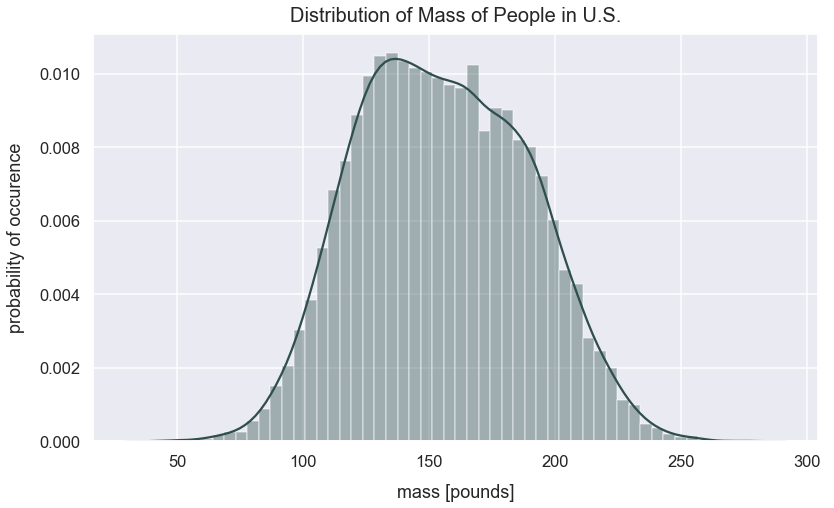

In [7]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

It's tough to characterize this distribution. It's got one large peak around 140 pounds, and it's not a normal distribution since there's no symmetry around a central value.

### Calculate Population Summary Statistics

#### Calculation Population Mean

In [8]:
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.4232805942338

#### Calculate Population Standard Deviation

In [9]:
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.585190883958624

### Problem Setup

I later sampled 25 people who frequent the gym at least three time per week. In statistics, we call this the **treatment effect**. The **dependent variable** is still these people's mass in pounds. 

The mean sample mass of people who frequent the gym at least three times per week is 163 pounds.  I'm curious how this compares to our current population of people's mass. In order to compare this new sample of people from the gym, I need to compare it to an equivalent distribution of sample means from our population.

I need to calculate where this sample mean of 163 pounds would fall on the distribution of sample means from the masses of people from the U.S. population.

### Create List of Sample Means with $n=25$

Hypothetically, it's biased to simply select a single sample from our population and compare it to the gym goers.

Given our population mass values, I will take 300 samples each of 25 random values with replacement. For each sample, I will calculate the mean of the sample. I store all those sample means in the list `sample_means`.

In [10]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

### View Distribution of Sample Means (Otherwise Called Sampling Distribution)

Let's view the distribution of these `sample_means` values.

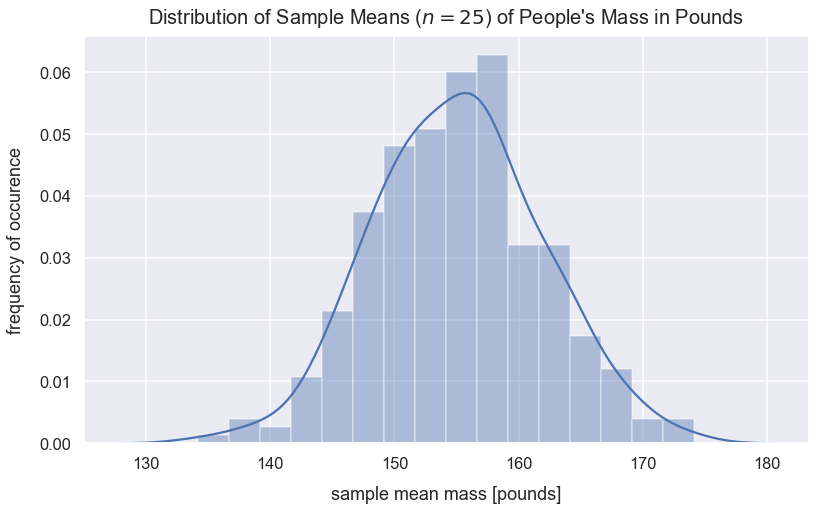

In [11]:
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Wow! This distribution of sample means looks normal! The curve is fairly symmetrical around the central value and the median is roughly equivalent to the mean (see below). Based on the central limit theorem, sampling a sufficient number of times with a sufficient size will result in a normal distribution of sample means.

### Calculate Sampling Distribution ($n=25$) Summary Statistics

Below are summary statistic calculations for the sampling distribution visualized above.

#### Calculate Median of Sample Means

In [12]:
median_of_sample_means = np.mean(sample_means)
median_of_sample_means

155.12418330193915

#### Calculate Mean of Sample Means

In [13]:
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.12418330193915

In [14]:
pop_mean_mass

155.4232805942338

This `mean_of_sample_means` value is roughly equivalent to our population mean value assigned to the variable `pop_mean_mass`. Based on the central limit theorem, this will always be the case!

#### Calculate Standard Deviation of Sample Means

In [15]:
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.734407481483423

### Equation for Standard Deviation of Sampling Distribution

The standard deviation of sample means is more commonly called the **standard error (SE)**. An interesting tidbit from the central limit theorem is that I can calculate this value off the population standard deviation and sample size. The equation for standard error is:

$$SE=\frac{\sigma }{\sqrt{n}}$$

- $\sigma$ is population standard deviation
- $n$ is sample size

In [16]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791725

In [17]:
std_dev_of_sample_means

6.734407481483423

This standard error value is the same as the value calculated above for `std_dev_of_sample_means`.

### Compare New Sample Mean to our Sampling Distribution

Let's see how the sample of people from the gym compares to this sampling distribution. Remember, the sample mean of people from the gym was 163 pounds.

This value of 163 is a **point estimate** because it's a single point estimate.

I'd naively estimate all samples from this gym would have a mean of 163 pounds. However, if I were to collect additional samples from the gym, I wouldn't expect the mean of the sample means to be *exactly* 163.

In [18]:
gym_sample_mean = 163

#### Visualize Gym Sample Mean Compared to Sampling Distribution

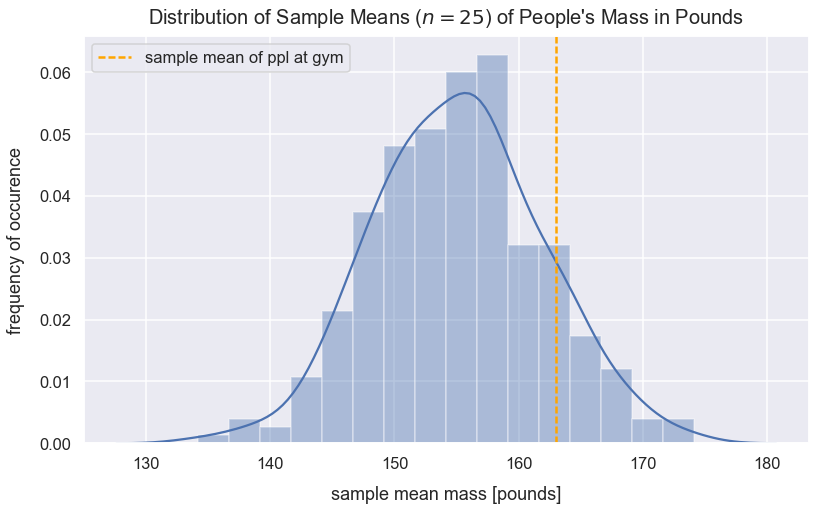

In [19]:
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean of ppl at gym", c='orange')
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

#### Calculate Proportion of Sample Means Less Than Gym Sample Mean

What's the probability of seeing a sample mean with a value less than 163?

Given this new sample mean of people at the gym, I can calculate the number of standard errors this value is from the mean of the sampling distribution. Let's calculate the z-score for `gym_sample_mean`.

I can use the following z-score equation:

$$z=\frac{\bar{x}-\mu}{SE}$$

- $\bar{x}$ is the sample mean
- $\mu$ is the population mean
- $SE$ is the standard error calculated as $\frac{\sigma }{\sqrt{n}}$

In [20]:
z_score = (gym_sample_mean - mean_of_sample_means)/standard_error
z_score

1.172513314763173

The `cdf()` method from the scipy package and accompanying stats module returns the proportion of values smaller than the observation inputted for a normal distribution.

In [21]:
prop_values_less_than_gym_sample_mean =  round(stats.norm.cdf(z_score), 3)
prop_values_less_than_gym_sample_mean

0.88

In [22]:
print("The probability of getting a sample mean less than the gym sample mean is {0}".format(prop_values_less_than_gym_sample_mean))

The probability of getting a sample mean less than the gym sample mean is 0.88


#### Visualize Proportion of Sample Means Less Than Gym Sample Mean

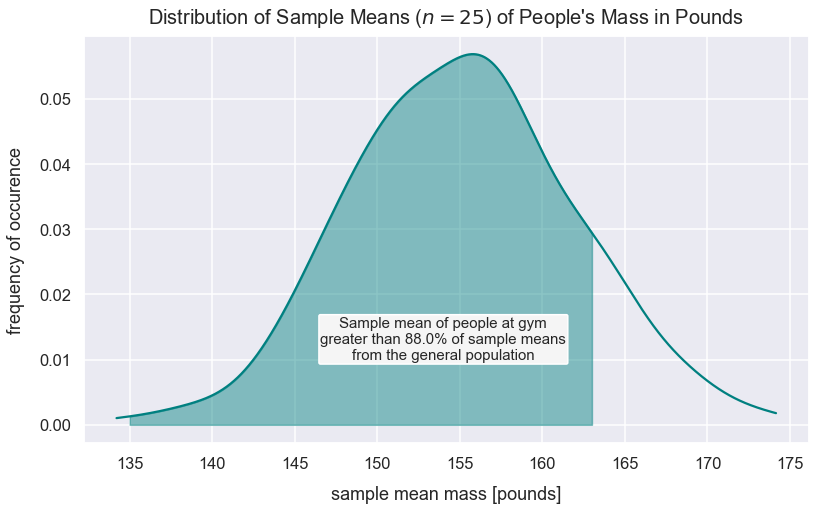

In [23]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(135, gym_sample_mean, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=15, 
         s="Sample mean of people at gym\ngreater than {0}% of sample means\nfrom the general population".format(round(prop_values_less_than_gym_sample_mean*100, 2)), 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

### Critical Z-Scores

For the sampling distribution above, approximately 95% of the values will fall within 2 standard errors of the mean. Let's calculate the exact z-score values that bound 95% of the data. We know that the tails on each end should be 2.5% or 0.025 of the the total area under the curve of the sampling distribution.

Below I use a z-score of 1.96 to calculate a tail of 0.025.

In [24]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

The area under the curve between the z-critcal scores is approximately 0.95

In [25]:
1 - (tail * 2)

0.950004209703559

Let's calculate the exact bounds for the area in which 95% of sample means lie from the population mean.

In [26]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

141.95878847542738

In [27]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

168.28957812845093

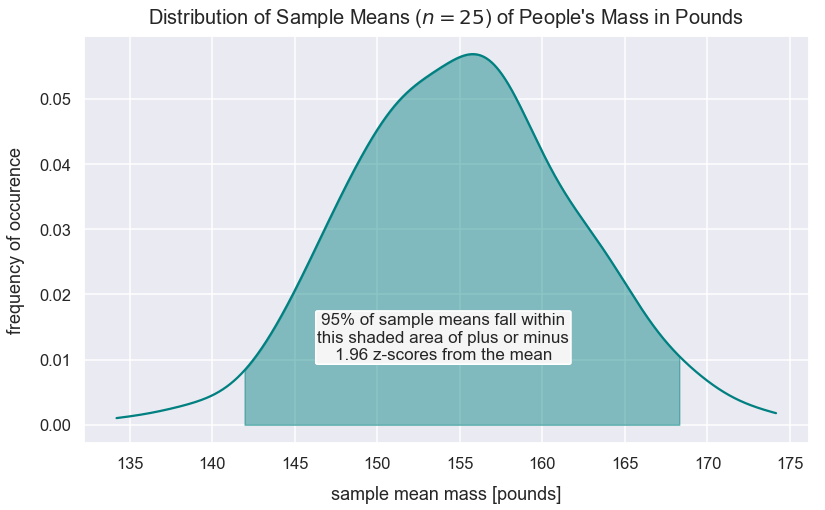

In [28]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Other critical z-scores:

z-score | % of area under a normal distribution curve
--- | ---
1.96 | 95
2.33 | 98
2.58 | 99

### Confidence Interval for Gym Members' Mass in Pounds

If we sampled everyone who frequented the gym, we know there'd likely be a new population of values of people's mass, but we don't know where it'd be. There's a 95% chance we'd see the `gym_sample_mean` in this new distribution of masses for people that frequent the gym.

However, be aware that `gym_sample_mean` is a point estimate that's likely to have **sampling error** because the people in the sample may be underrepresented from other samples with those characteristics. It's possible most other samples of people who frequent the gym at least three times per week have a sample mean mass value far different than 163 pounds.

We can calculate where we'd expect 95% of the values to lie in this new distribution. 95% of new sample means of people from the gym would fall within 1.96 standard errors from the expected population mean.

$\mu_{gym}$ is the new population mean of people's masses who frequent the gym. Our best guess is `gym_sample_mean` though we know it'll likely be in some interval around that.
  
We can express a generic formula for a 95% confidence interval for the expected population mass of gym goers as: 

$$(\mu_{gym} - 1.96*\frac{\sigma}{\sqrt{n}},  \mu_{gym} + 1.96*\frac{\sigma}{\sqrt{n}})$$

 - $1.96$ is the z-score for a 95% confidence interval (CI)
 - $\frac{\sigma}{\sqrt{n}}$ is equivalent to the standard error (std. dev. of the sampling distribution)
 - $\mu_{gym}$ is the population mean of the new people sampled that frequent the gym 3x per week
 
We'd expect 95% of sample means to fall within the interval above, so we can express that using our point estimate as:
 
$$(\mu_{gym} + 1.96*\frac{\sigma}{\sqrt{n}} < GymSampleMean < \mu_{gym} - 1.96*\frac{\sigma}{\sqrt{n}})$$
 
This equation above simplifies to:
 
$$GymSampleMean + 1.96*\frac{\sigma}{\sqrt{n}} > \mu_{gym} > GymSampleMean - 1.96*\frac{\sigma}{\sqrt{n}}$$

This term of $z*SE$ above is commonly referred to as the **margin of error**.

Let's calculate these upper and lower bounds for our 95% confidence interval.

In [29]:
lower_bound_95_perc = gym_sample_mean - 1.96*standard_error
lower_bound_95_perc

149.83460517348823

In [30]:
upper_bound_95_perc = gym_sample_mean + 1.96*standard_error
upper_bound_95_perc

176.16539482651177

The generic formula for a confidence interal is:

$$\bar{x}-z*\frac{\sigma}{\sqrt{n}}, \bar{x}-z*\frac{\sigma}{\sqrt{n}}$$

- $\bar{x}$ is the sample mean
- $z*\frac{\sigma}{\sqrt{n}}$ is the magnitude of the numbero of standard errors away from a value

#### Visualize 95% Confidence Interval

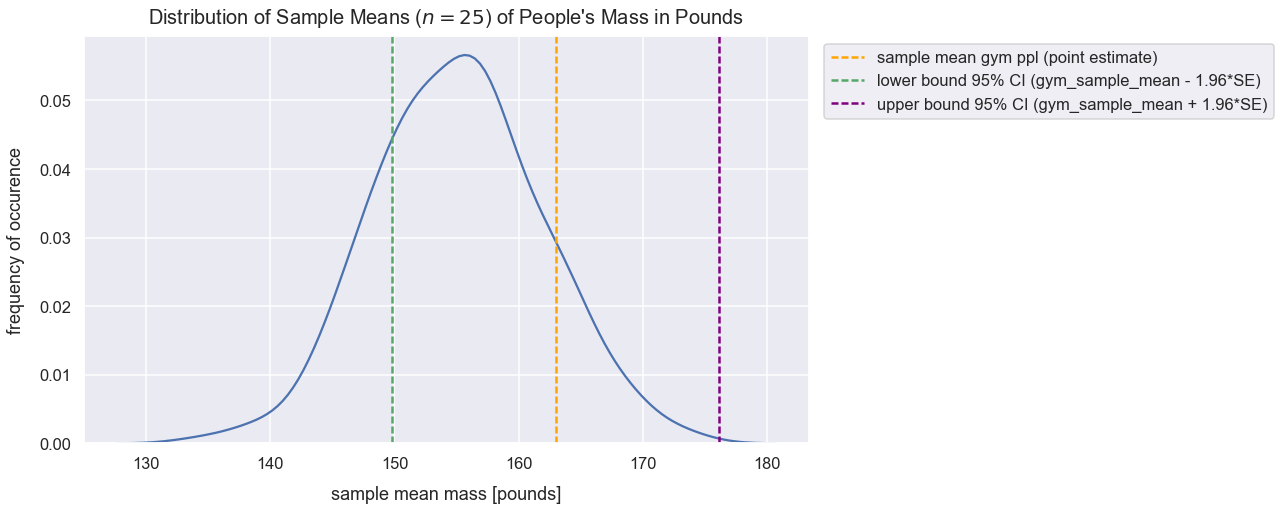

In [31]:
sns.distplot(sample_means, hist=False)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean gym ppl (point estimate)", c='orange')
plt.axvline(x=lower_bound_95_perc, linestyle='--', linewidth=2.5, label="lower bound 95% CI (gym_sample_mean - 1.96*SE)", c='g')
plt.axvline(x=upper_bound_95_perc, linestyle='--', linewidth=2.5, label="upper bound 95% CI (gym_sample_mean + 1.96*SE)", c='purple')
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

The population mean could range from the green to the purple vertical dotted lines above. Below is another way of visualizing that.

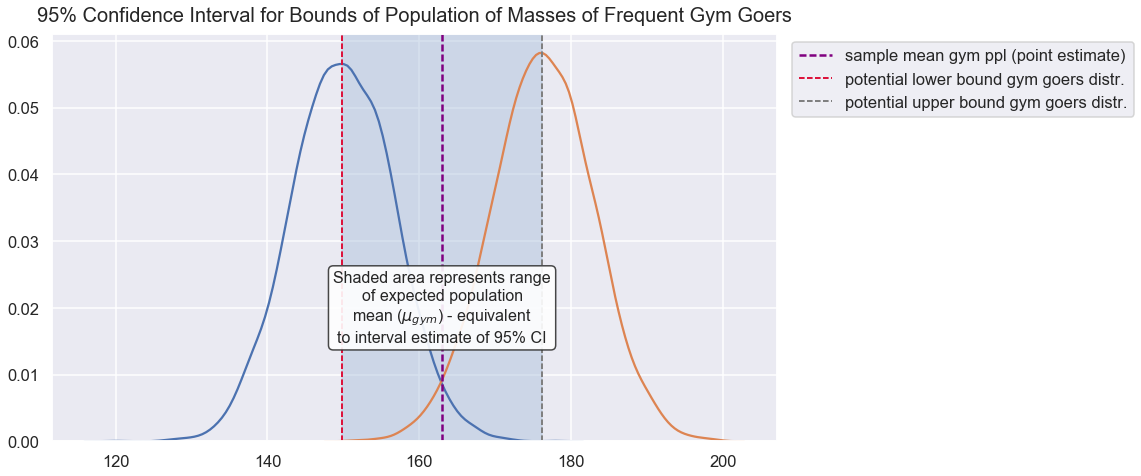

In [33]:
values = np.random.normal(loc=lower_bound_95_perc, scale=standard_error, size=5000)
sns.distplot(values, hist=False)
values2 = np.random.normal(loc=upper_bound_95_perc, scale=standard_error, size=5000)
sns.distplot(values2, hist=False)
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean gym ppl (point estimate)", c='purple')
plt.axvline(x=lower_bound_95_perc, linestyle='--', linewidth=2, c='crimson', label='lower 95% CI bound')
plt.axvline(x=upper_bound_95_perc, linestyle='--', linewidth=2, c='gray', label='upper 95% CI bound')
plt.title("95% Confidence Interval for Bounds of Expected Population of Masses of Frequent Gym Goers", y=1.015, fontsize=20)
bbox_props = dict(boxstyle="round", fc="w", ec="0.2", alpha=0.9)
plt.text(gym_sample_mean, 0.02, "Shaded area represents range\nof expected population\nmean ($\mu_{gym}$) - equivalent\nto interval estimate of 95% CI", ha="center", 
         va="center", size=16, bbox=bbox_props)
plt.axvspan(lower_bound_95_perc, upper_bound_95_perc, alpha=0.5, color='lightsteelblue')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

The **interval estimate** for the shaded area above is:

$$(GymSampleMean - 1.96*\frac{\sigma}{\sqrt{n}}, GymSampleMean + 1.96*\frac{\sigma}{\sqrt{n}}$$

### Effect of Sample Size on Confidence Interval

Our $n$ for our frequent gym-goers sample was 25 people. If we took a sample with an even smaller $n$, we'd get a larger range for our confidence interval bounds. The reason for this is because our standard error would be smaller.  

Bigger samples give us more precise estimates by giving us a smaller confidence interval in which the true population mean likely lies in. This is a more ideal situation to help us estimate our population parameters. 